In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


In [ ]:
# Cargar datasets reales
# Dataset 1: Precio del petróleo (No estacionario)
# Updated URL for the oil-prices dataset
url_petroleo = "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv"
df_petroleo = pd.read_csv(url_petroleo, parse_dates=["Date"], index_col="Date")
serie_petroleo = df_petroleo["AAPL.High"] # Changed to a column name in the new dataset

# Dataset 2: Rendimientos diarios del S&P 500 (Ejemplo de serie estacionaria)
url_sp500 = "https://raw.githubusercontent.com/datasets/s-and-p-500/master/data/data.csv"
df_sp500 = pd.read_csv(url_sp500, parse_dates=["Date"], index_col="Date")
# Change 'Close' to 'SP500' to match the actual column name
df_sp500["Returns"] = df_sp500["SP500"].pct_change()
serie_sp500 = df_sp500["Returns"].dropna()  # Primera columna con los rendimientos

# Dataset 3: Ventas minoristas (Serie no estacionaria con estacionalidad)
url_ventas = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df_ventas = pd.read_csv(url_ventas, parse_dates=["Month"], index_col="Month")
serie_ventas = df_ventas["Passengers"]

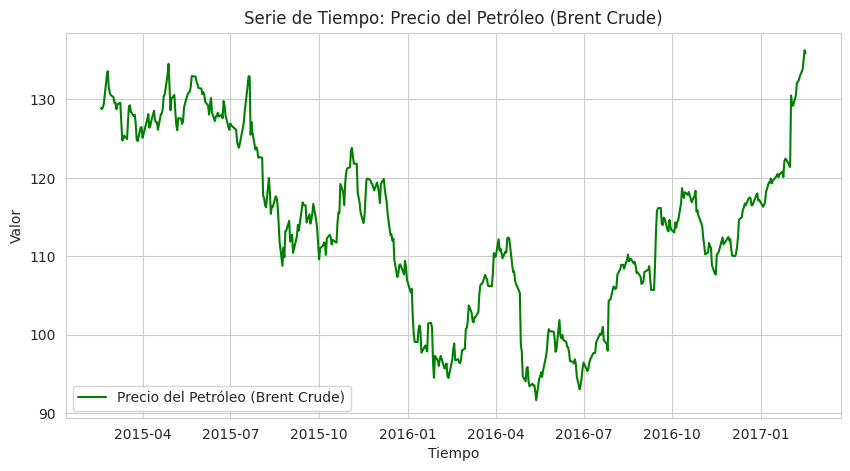

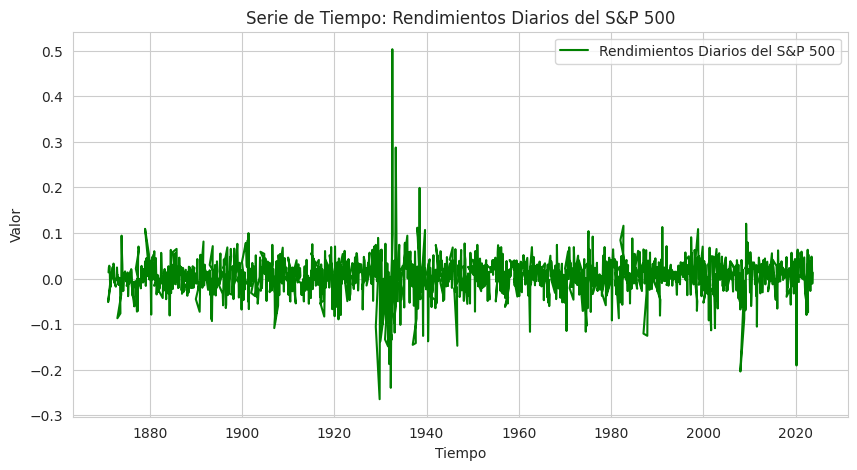

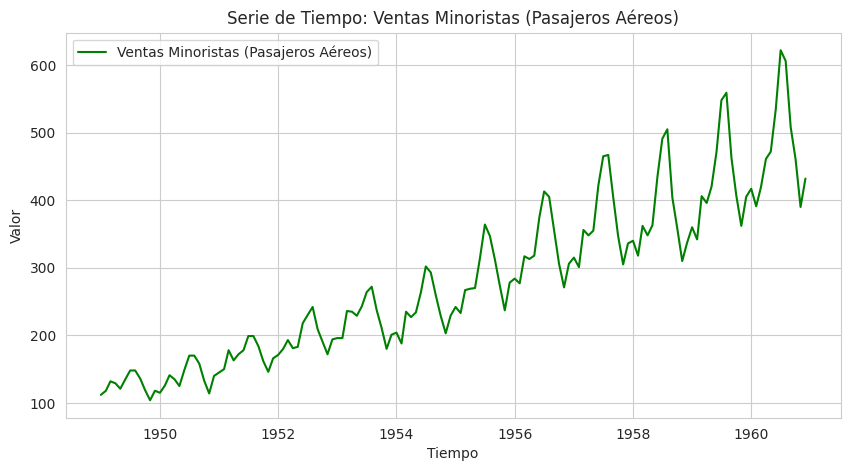

In [ ]:
# Función para graficar la serie de tiempo
def plot_series(serie, titulo):
    plt.figure(figsize=(10,5))
    plt.plot(serie, label=titulo, color='green')
    plt.title(f"Serie de Tiempo: {titulo}")
    plt.xlabel("Tiempo")
    plt.ylabel("Valor")
    plt.legend()
    plt.show()

# Graficamos las series
plot_series(serie_petroleo, "Precio del Petróleo (Brent Crude)")
plot_series(serie_sp500, "Rendimientos Diarios del S&P 500")
plot_series(serie_ventas, "Ventas Minoristas (Pasajeros Aéreos)")

In [ ]:
# Función para aplicar la prueba de Dickey-Fuller
def adf_test(serie, nombre):
    print(f"\nPrueba de Dickey-Fuller para {nombre}")
    resultado = adfuller(serie.dropna())
    print(f"Estadístico de Prueba: {resultado[0]}")
    print(f"Valor p: {resultado[1]}")
    print("Valores Críticos:")
    for clave, valor in resultado[4].items():
        print(f"   {clave}: {valor}")
    if resultado[1] < 0.05:
        print(f"La serie {nombre} es estacionaria.")
    else:
        print(f"La serie {nombre} NO es estacionaria.")

# Aplicamos la prueba de Dickey-Fuller
adf_test(serie_petroleo, "Precio del Petróleo")
adf_test(serie_sp500, "Rendimientos Diarios del S&P 500")
adf_test(serie_ventas, "Ventas Minoristas")


Prueba de Dickey-Fuller para Precio del Petróleo
Estadístico de Prueba: -1.1443379522574841
Valor p: 0.697070645441985
Valores Críticos:
   1%: -3.4434175660489905
   5%: -2.8673031724657454
   10%: -2.5698395516760275
La serie Precio del Petróleo NO es estacionaria.

Prueba de Dickey-Fuller para Rendimientos Diarios del S&P 500
Estadístico de Prueba: -10.61405104762157
Valor p: 5.735351476896668e-19
Valores Críticos:
   1%: -3.433966009459769
   5%: -2.8631372667825503
   10%: -2.567620331903232
La serie Rendimientos Diarios del S&P 500 es estacionaria.

Prueba de Dickey-Fuller para Ventas Minoristas
Estadístico de Prueba: 0.8153688792060498
Valor p: 0.991880243437641
Valores Críticos:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598
La serie Ventas Minoristas NO es estacionaria.
